In [205]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pylab as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# importing csv file

In [206]:
df = pd.read_csv('DRIFT_DATA_TRAIN.csv')
print(df.columns)

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c'],
      dtype='object')


In [207]:
var=df.copy()
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334


# examinig the columns

In [208]:
var.describe()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
count,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,339478.000000,72768.000000,339478.000000,339478.000000
mean,2007.013774,6.749374,15.744955,190.020314,163.595093,156.507375,-0.333029,1.359709,35576.107397,-0.096208,0.335691,0.955278,1.774036,2.069873,418.132032
std,9.822726,3.454148,8.752622,105.562830,24.451743,34.697790,8.072700,7.860918,31444.526635,4.319904,4.124477,0.124625,0.800483,0.922070,259.827915
min,1979.000000,1.000000,1.000000,1.000000,39.168983,36.870293,-74.682899,-66.781601,0.000000,-23.084634,-20.146717,0.000027,0.016601,0.000000,0.359009
25%,2000.000000,4.000000,8.000000,101.000000,146.809723,129.208836,-3.722860,-2.325024,7408.000000,-3.149262,-2.617482,0.976706,1.215125,1.478507,210.220330
50%,2009.000000,7.000000,16.000000,190.000000,161.223709,152.350731,-0.024725,0.322306,26150.000000,-0.165074,0.289388,1.000000,1.733047,2.041238,389.570385
75%,2015.000000,10.000000,23.000000,285.000000,181.115864,179.608978,2.942216,4.969131,64878.000000,2.934149,3.204041,1.000000,2.284967,2.619901,599.120875
max,2019.000000,12.000000,31.000000,364.000000,279.391541,279.562073,68.396103,68.639801,99800.000000,17.911558,22.862028,1.000000,4.930797,6.284669,1120.364872


In [209]:
var.dtypes

year           int64
month          int64
day            int64
doy            int64
x_EASE       float64
y_EASE       float64
u_buoy       float64
v_buoy       float64
id_buoy        int64
u_ERA5       float64
v_ERA5       float64
sic_CDR      float64
h_cs2smos    float64
h_piomas     float64
d2c          float64
dtype: object

In [210]:
# sorting the dataframe with respect to date
var = var.sort_values(['year', 'month', 'day'], ascending=[True,True, True])

In [211]:
# looking for missing values
var.isnull().sum()

year              0
month             0
day               0
doy               0
x_EASE            0
y_EASE            0
u_buoy            0
v_buoy            0
id_buoy           0
u_ERA5            0
v_ERA5            0
sic_CDR           0
h_cs2smos    266710
h_piomas          0
d2c               0
dtype: int64

In [212]:
var.shape

(339478, 15)

In [213]:
# finding and removing duplicate values

var.drop_duplicates(keep='last',inplace=True) 
var.reset_index(drop=True, inplace=True)
print(var.shape)

(339203, 15)


# creating a new column which will be the count of the day from the first date of available data

In [214]:
a=pd.to_datetime(var[['year', 'month', 'day']])
a

0        1979-02-18
1        1979-02-18
2        1979-02-18
3        1979-02-18
4        1979-02-19
            ...    
339198   2019-12-30
339199   2019-12-30
339200   2019-12-30
339201   2019-12-30
339202   2019-12-30
Length: 339203, dtype: datetime64[ns]

In [215]:
b = a.copy()
b=list(b)
c=[b[0]]
d=c+b
d.pop()
e = (np.array(b)-np.array(d))
f=[]
for i in e:
    f.append(i.days)
    
var['f']=f
var['day_no']=var['f'].cumsum()
var.drop('f', axis=1, inplace=True)
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,day_no
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298,0
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669,0
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379,0
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629,0
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334,1


In [216]:
var.tail()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,day_no
339198,2019,12,30,364,193.232056,172.742004,-0.981225,-11.69840,44880,-2.526544,-6.012877,1.000000,1.414148,1.620020,702.312813,14925
339199,2019,12,30,364,208.421234,142.049896,-7.247925,-5.28989,53005,-4.615093,-0.381765,1.000000,1.039972,1.288953,360.491321,14925
339200,2019,12,30,364,145.264023,146.109741,-0.913761,2.18215,95020,1.940967,1.119087,1.000000,2.059716,1.960349,393.799208,14925
339201,2019,12,30,364,193.921402,174.408707,-0.101372,-11.79170,7750,-2.468425,-5.363596,1.000000,1.411272,1.610893,680.057567,14925
339202,2019,12,30,364,100.407974,159.768845,0.000000,-0.00000,16461,1.372457,7.310530,0.949975,1.221326,1.339197,11.722729,14925


In [217]:
var.shape

(339203, 16)

In [218]:
var.columns

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c', 'day_no'],
      dtype='object')

In [219]:
# deleting irrelevant columns and columns with missing values. As almost two third of the data is missing from 
# the h_cs2mos column,it is removed
var.drop(['day','id_buoy','h_cs2smos'], axis=1, inplace=True)

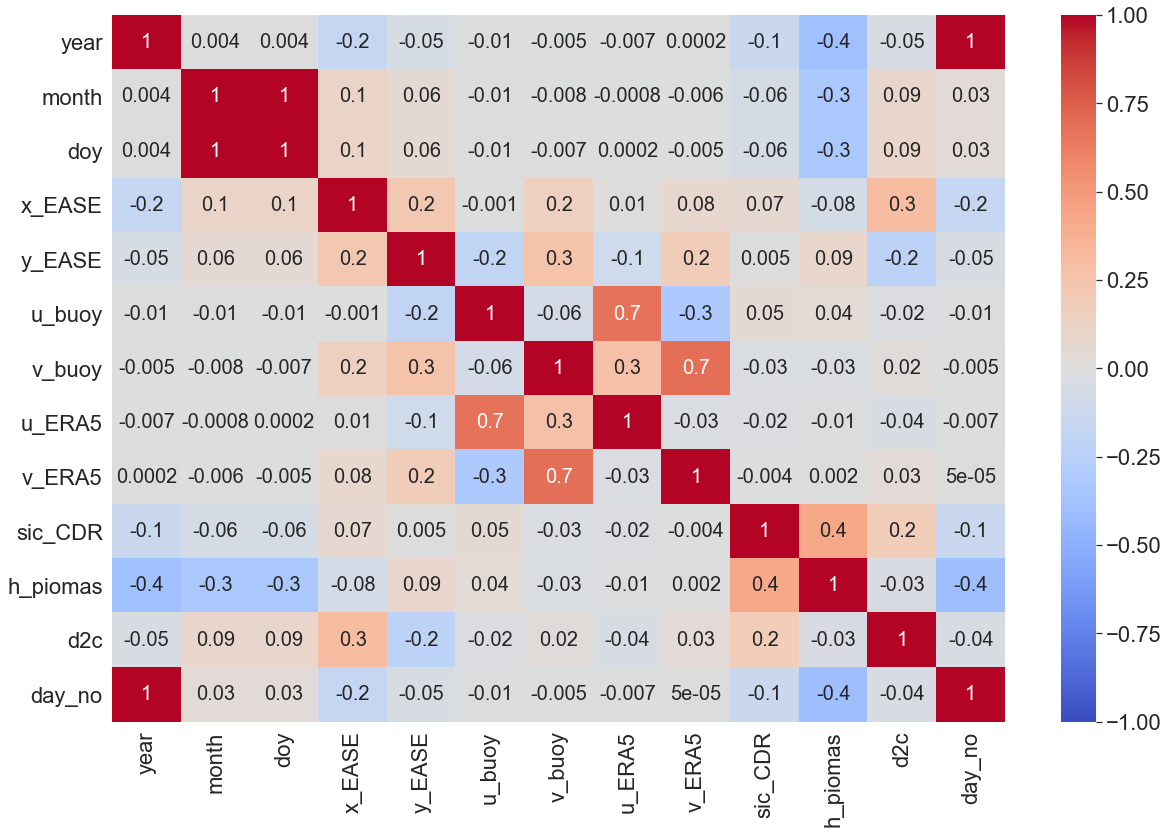

In [220]:
# Seeing the correlation among variables

fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

The horizontal and vertical component of the ice velocity and wind velocity and converted to magnitude and direction to see if
combinig their effect in this way can make it easier to predict for the models.

In [221]:
var['val_mag'] = np.sqrt(var['u_buoy']**2 + var['v_buoy']**2 )
var['wind_val_mag'] = np.sqrt(var['u_ERA5']**2 + var['v_ERA5']**2 )
var['val_dir'] = np.where(var['v_buoy']!= 0, np.degrees(np.arctan(var['v_buoy']/var['u_buoy'])), 0)
var['wind_val_dir'] = np.where(var['v_ERA5']!= 0, np.degrees(np.arctan(var['v_ERA5']/var['u_ERA5'])), 0)

In [222]:
var.tail()

,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,day_no,val_mag,wind_val_mag,val_dir,wind_val_dir
339198,2019,12,364,193.232056,172.742004,-0.981225,-11.69840,-2.526544,-6.012877,1.000000,1.620020,702.312813,14925,11.739478,6.522125,85.205433,67.208396
339199,2019,12,364,208.421234,142.049896,-7.247925,-5.28989,-4.615093,-0.381765,1.000000,1.288953,360.491321,14925,8.973035,4.630856,36.123795,4.728801
339200,2019,12,364,145.264023,146.109741,-0.913761,2.18215,1.940967,1.119087,1.000000,1.960349,393.799208,14925,2.365742,2.240471,-67.278820,29.966106
339201,2019,12,364,193.921402,174.408707,-0.101372,-11.79170,-2.468425,-5.363596,1.000000,1.610893,680.057567,14925,11.792136,5.904344,89.507446,65.287246
339202,2019,12,364,100.407974,159.768845,0.000000,-0.00000,1.372457,7.310530,0.949975,1.339197,11.722729,14925,0.000000,7.438245,0.000000,79.367225


Converting negative directions to postive angle for better understanding

In [223]:
def quadrant(row):
    if row['u_buoy'] >0 and  row['v_buoy'] >0:
        val = 1
    elif row['u_buoy'] <0 and  row['v_buoy'] >0:
        val = 2
    elif row['u_buoy'] <0 and  row['v_buoy'] <0:
        val = 3
    elif row['u_buoy'] >0 and  row['v_buoy'] <0:
        val = 4
    else:
        val = -1
    return val

In [224]:
var['ice_quadrant'] = var.apply(quadrant, axis=1)

In [225]:
def cor_direction(row):
    if row['ice_quadrant'] == 1:
        val = row['val_dir'] 
    elif row['ice_quadrant'] == 2:
        val = row['val_dir'] + 180
    elif row['ice_quadrant'] == 3:
        val = row['val_dir'] + 180
    elif row['ice_quadrant'] == 4:
        val = row['val_dir'] + 360
    else:
        val = row['val_dir'] 
    return val

In [226]:
var['vel_dir'] = var.apply(cor_direction, axis=1)
var.drop('val_dir', axis=1, inplace=True)

In [227]:
def wind_quadrant(row):
    if row['u_ERA5'] >0 and  row['v_ERA5'] >0:
        val = 1
    elif row['u_ERA5'] <0 and  row['v_ERA5'] >0:
        val = 2
    elif row['u_ERA5'] <0 and  row['v_ERA5'] <0:
        val = 3
    elif row['u_ERA5'] >0 and  row['v_ERA5'] <0:
        val = 4
    else:
        val = -1
    return val

In [228]:
var['wind_quadrant'] = var.apply(wind_quadrant, axis=1)

In [229]:
def cor_direction2(row):
    if row['wind_quadrant'] == 1:
        val = row['wind_val_dir'] 
    elif row['wind_quadrant'] == 2:
        val = row['wind_val_dir'] + 180
    elif row['wind_quadrant'] == 3:
        val = row['wind_val_dir'] + 180
    elif row['wind_quadrant'] == 4:
        val = row['wind_val_dir'] + 360
    else:
        val = row['wind_val_dir'] 
    return val

In [230]:
var['wind_dir'] = var.apply(cor_direction2, axis=1)
var.drop('wind_val_dir', axis=1, inplace=True)

In [231]:
var.columns

Index(['year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c', 'day_no', 'val_mag',
       'wind_val_mag', 'ice_quadrant', 'vel_dir', 'wind_quadrant', 'wind_dir'],
      dtype='object')

In [232]:
len(var.columns)

19

In [233]:
var = var[['day_no','year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy', 'val_mag', 'vel_dir', 'ice_quadrant', 'u_ERA5', 'v_ERA5',
         'wind_val_mag','wind_quadrant','wind_dir','sic_CDR', 'h_piomas', 'd2c']]

In [234]:
len(var.columns)

19

In [235]:
var.loc[var.vel_dir == -90, 'vel_dir'] = 270

# Seeing the correlations with new column formatting

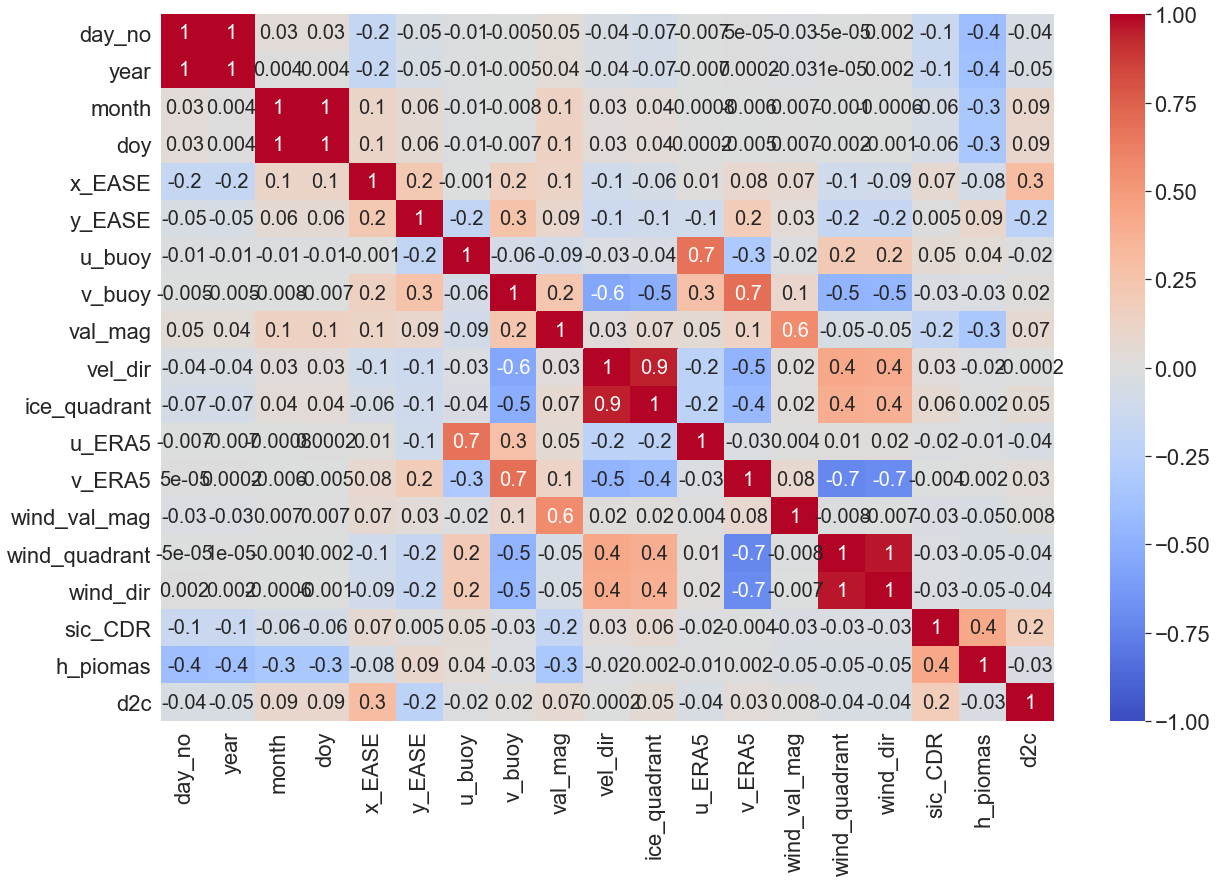

In [236]:
fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

# Understanding the data visually

plotting the day number in xy grid to see when the last data was recorded in an area and also how the data is distributed

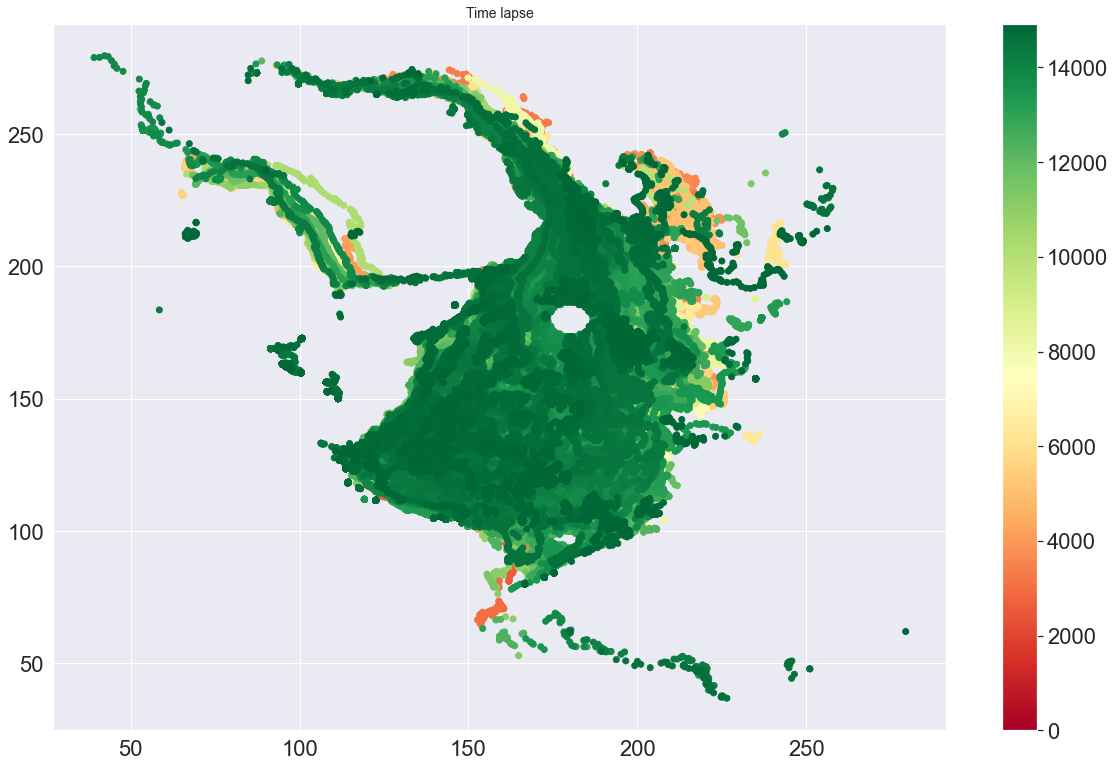

In [237]:
fig, ax = plt.subplots(figsize=(20,13))  
ax.set_title('Time lapse',
               fontsize=14)
sctr = ax.scatter(x=var['x_EASE'], y=var['y_EASE'], c=var['day_no'], cmap='RdYlGn')
plt.colorbar(sctr, ax=ax, format='%d')

plt.show()

Seeing the frequency of data in the grid. In the darkest blue part no data is available and in the darkest red part the data 
frequency is thhe highest. from the plot we can see that there are two (5X5) cells where the daat frequency is more than 2500.

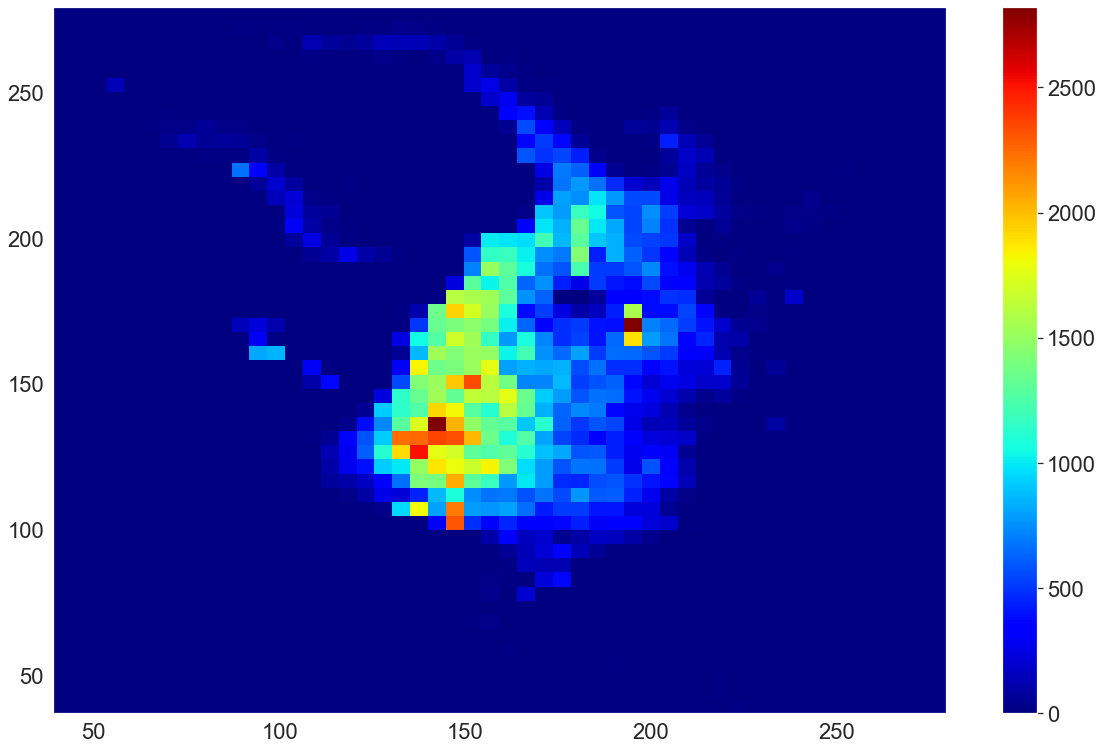

In [238]:
x = var['x_EASE']
y = var['y_EASE']
fig, ax = plt.subplots(figsize=(20,13))
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.grid(True)
plt.show()
 

In [239]:
var.columns

Index(['day_no', 'year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy',
       'v_buoy', 'val_mag', 'vel_dir', 'ice_quadrant', 'u_ERA5', 'v_ERA5',
       'wind_val_mag', 'wind_quadrant', 'wind_dir', 'sic_CDR', 'h_piomas',
       'd2c'],
      dtype='object')

In [240]:
var.shape

(339203, 19)

In [241]:
max_x = max(var['x_EASE'])
min_x = min(var['x_EASE'])
max_y = max(var['y_EASE'])
min_y = min(var['y_EASE'])

print("maximum x coordinate" ,  max(var['x_EASE']))
print("minimum x coordinate" ,  min(var['x_EASE']))
print("maximum y coordinate" ,  max(var['y_EASE']))
print("minimum y coordinate" ,  min(var['y_EASE']))
print("maximum valocity magnitude" ,  max(var['val_mag']))

maximum x coordinate 279.39154052734403
minimum x coordinate 39.168983459472706
maximum y coordinate 279.56207275390597
minimum y coordinate 36.870292663574205
maximum valocity magnitude 75.60970444552193


An animated graph is plotted to see the variation of velocity magnitude against both space and time. To better understand the change the color bar limit has been fixed. But as more than 99.9%values are under 59.3, the variation is not readily visible in their color. So another graph is plotted keeping the color bar between 0 to 20, which means it will only show velocity magnitudes whose values are with 20m/s, that covers around 93% values.

In [242]:
def velocity_vs_time1(a):
    #x = h['date'][a:b]
    #y = h[["RF", "mean","1.25", "0.75"]][a:b]
    fig, ax = plt.subplots(figsize=(15,12))  
    ax.set_title('Change in absolute Velocity with time across ease grid',
                   fontsize=14)
    sctr = ax.scatter(x=var['x_EASE'][a:a+250], y=var['y_EASE'][a:a+250], c=var['val_mag'][a:a+250], cmap='RdYlGn')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    sctr.set_clim(vmin=0, vmax=76)
    plt.colorbar(sctr, ax=ax, format='%d')
    
    plt.show()
interact(velocity_vs_time1, a=(0,339200,250))

interactive(children=(IntSlider(value=169500, description='a', max=339200, step=250), Output()), _dom_classes=…

<function __main__.velocity_vs_time1(a)>

In [243]:
def animated2(a):

    fig, ax = plt.subplots(figsize=(15,12))  
    ax.set_title('Change in absolute Velocity with time across ease grid 2',
                   fontsize=14)
    sctr = ax.scatter(x=var['x_EASE'][a:a+250], y=var['y_EASE'][a:a+250], c=var['val_mag'][a:a+250], cmap='RdYlGn')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    sctr.set_clim(vmin=0, vmax=20)
    plt.colorbar(sctr, ax=ax, format='%d')
    
    plt.show()

interact(animated2, a=(0,339200,250))


interactive(children=(IntSlider(value=169500, description='a', max=339200, step=250), Output()), _dom_classes=…

<function __main__.animated2(a)>

From the 2D histograph, it can be seen that two grid cells have a large number of values. One of them is chosen to see the trend in velocity change considering the whole cell a single point. So within the grid area every value is taken.

In [244]:
trend_df = var[(var['x_EASE']<145) & (var['x_EASE']>140) & (var['y_EASE']<135) & (var['y_EASE']>130)]

In [245]:
trend_df.reset_index(drop=True, inplace=True)

In [246]:
trend_df.tail()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,vel_dir,ice_quadrant,u_ERA5,v_ERA5,wind_val_mag,wind_quadrant,wind_dir,sic_CDR,h_piomas,d2c
2556,14921,2019,12,360,142.102768,133.422104,-0.635957,-1.947791,2.048983,251.918053,3,3.058329,-0.481142,3.095945,4,351.059394,1.0,1.611687,513.142056
2557,14922,2019,12,361,142.080826,133.354996,-13.080325,-0.913935,13.112215,183.996816,3,-3.862811,-2.348644,4.520778,3,211.300202,1.0,1.631493,514.175626
2558,14923,2019,12,362,141.630035,133.323471,-19.656851,5.091210,20.305472,165.479231,2,-8.863487,3.898148,9.682818,2,156.260179,1.0,1.655937,508.284087
2559,14924,2019,12,363,140.952560,133.498901,-9.821410,2.397960,10.109911,166.279307,2,-7.422970,3.056054,8.027450,2,157.622923,1.0,1.670645,495.129299
2560,14925,2019,12,364,140.638519,133.558441,-1.423450,1.358810,1.967886,136.330909,2,-4.437601,4.623100,6.408226,2,133.827150,1.0,1.712813,489.580783


In [247]:
# Seeing the range of days in the grid part
trend_df['day_no'].unique()

array([  146,   147,   148, ..., 14923, 14924, 14925], dtype=int64)

In [248]:
trend_df.shape

(2561, 19)

In [249]:
trend_df = trend_df.sort_values('day_no', ascending=True)

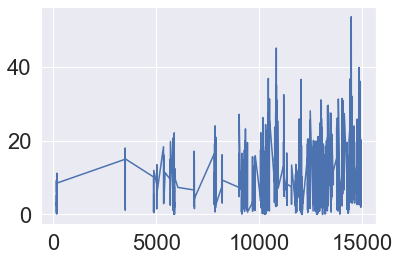

In [250]:
plt.plot(trend_df['day_no'], trend_df['val_mag'], label="val_mag")

plt.show()